#  Graduate Admissions

## Data pre-processing and exploratory analysis

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

### Importing data

In [2]:
data_source = "https://raw.githubusercontent.com/jancpp/Graduate_admissions/master/data/Admission_Predict_Ver1.1.csv"
df = pd.read_csv(data_source)

### Getting to know data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Features
- gre_score
- toefl_score
- university_rating
- sop
- lor
- cgpa
- research

### Target
- chance_of_admit

In [13]:
# Renaming columns
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(" ", "_")
df = df.rename(index=str, columns={"lor_": "lor", "chance_of_admit_": "chance_of_admit"});

In [16]:
#Dropping "serial_no." as it is not needed
df = df.drop(columns = ['serial_no.'])

In [18]:
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
df.to_pickle(r'C:\Users\nishi\Desktop\df.pkl')

## Exploratory data analysis

### Using a pairplot to visualize distribution of data and correlation among columns
- As we can see - toefl_score, gre_score and cgpa have linear relationship among themselves and with target chance_of_admit
- That means people who scored higher in gre, also scored higher in toefl and vice versa
- People with higher cgpa score higher in gre and toefl
- higher gre & toelf score means higher chance of admit

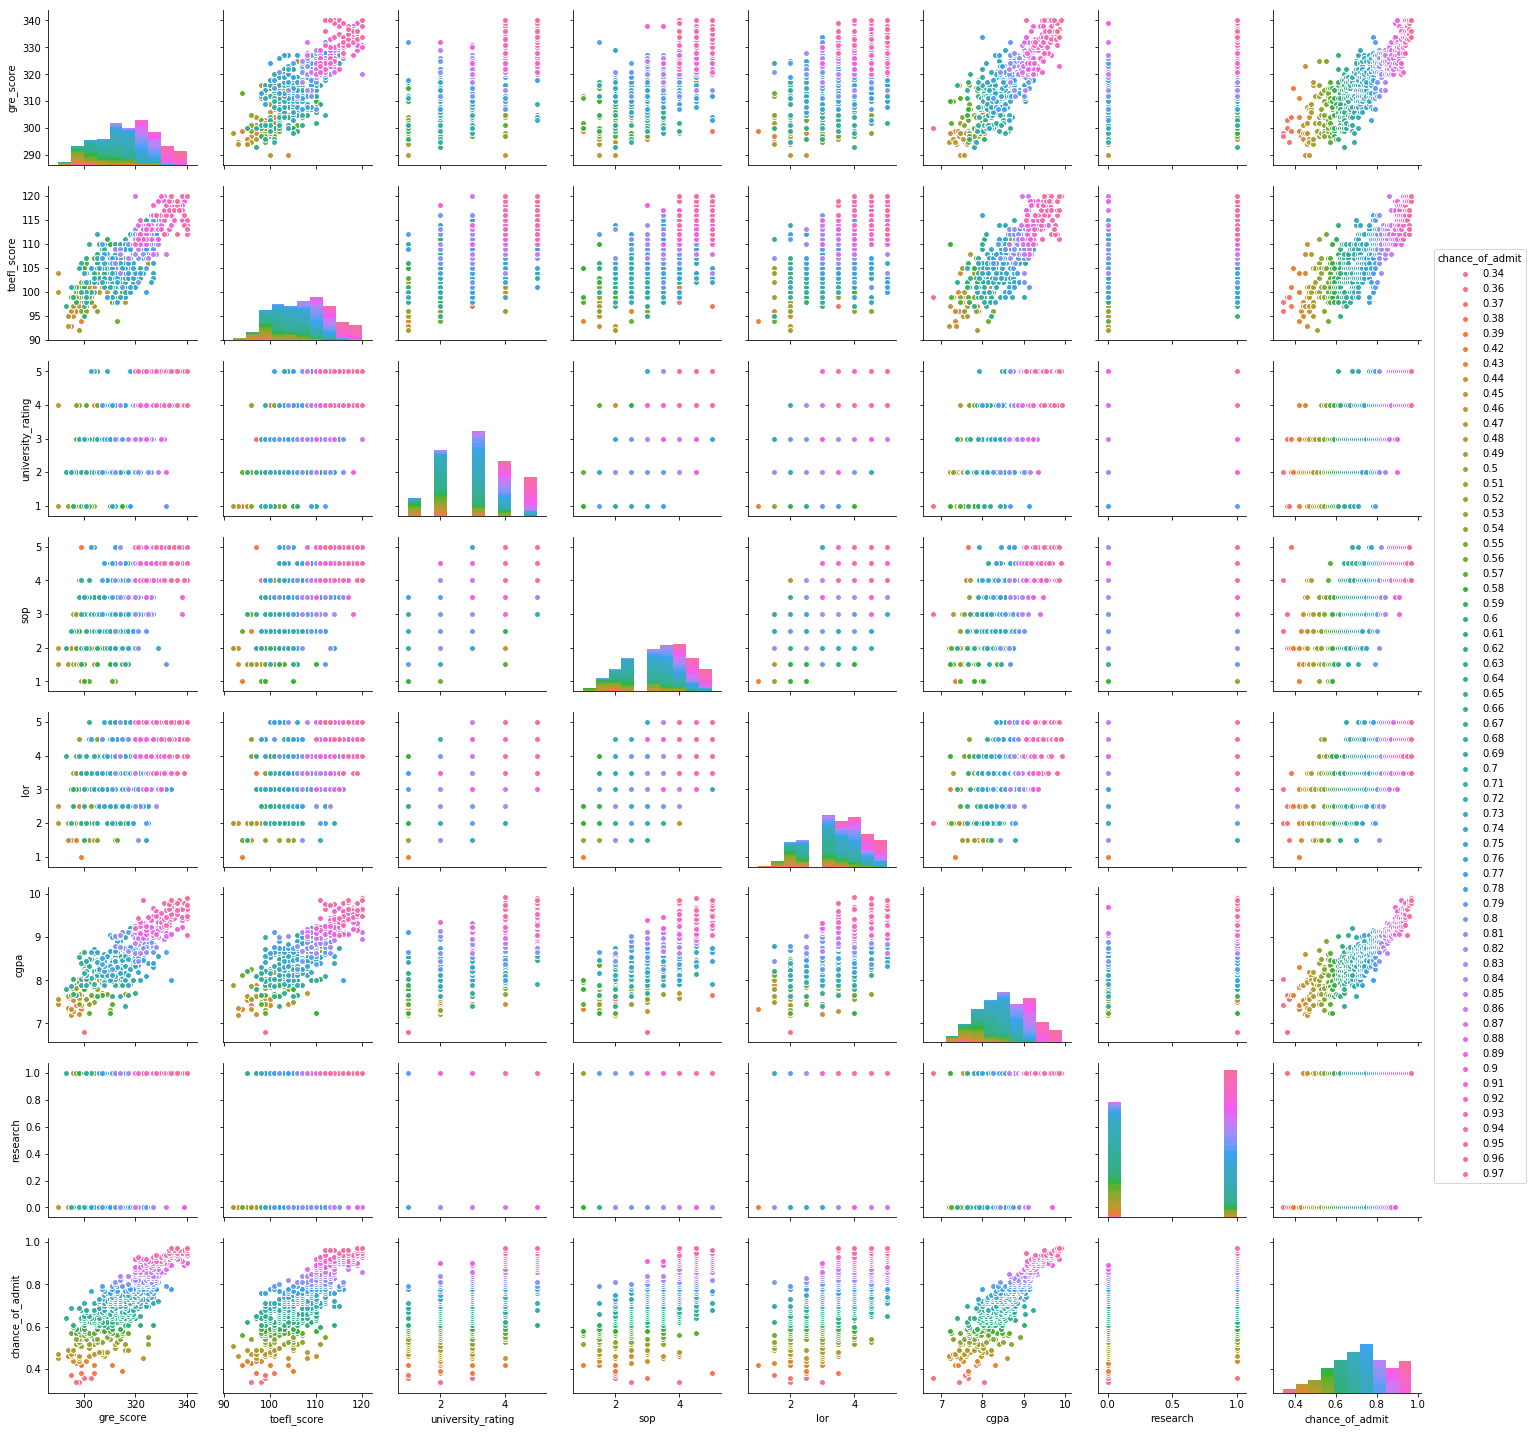

In [23]:
sns.pairplot(df, hue = 'chance_of_admit')

### Correlation matrix
- Darker squares means higher correlation
- Best case scenario is having  many features having higher correlation with target, but lower correlation among themselves

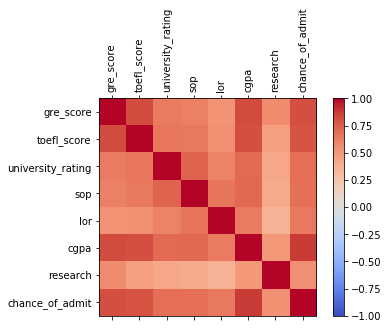

In [26]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()